# Mentoring 3 -- Classification Model (Credit Risk loan_status)
---



Mentoring Session - Job Preparation Program - Pacmann AI

## Instructions
---

Credit Risk : The possibility of a loss resulting from a borrower's failur to repay a loan or meet contractial obligations.

Task Description

1. Case :
- You are working as a data scientist in a risk analyst team in a finance industry.
- your company generates profit by giving loans to customers
- However, your company might suffer loss if the customer did not pay the loan back (we called it as default customer)
- to minimize the loss, the simple thing to do is to prevent bad applicants (who later become a default customer) get the loan.
- As a data scientist, you want to create a classifier model to classify good or bad applicants from the given customer data to minimize the potential loss

2. Modeling task:
- Task 1: Data preparation (score 30)
    Load the dataset correctly.
    Split the dataset for further tune the model & predict correctly.
    Perform EDA and conclude the data preprocessing plan from that.
    Perform data preprocessing according to plan.

- Task 2: Modeling (45)
    Define the metrics (you can use more than 1 metrics, just explain why) for optimizing the model.
    Define your baseline model (explain why) and print out the score that you want to beat.
    do a proper best model search & hyperparameter tuning (explain why you choose those models and why you choose those hyperparameter)
    Define your best model (explain why).

- Task 3: Model evaluation (score: 30)
    how does your best model perform in the test data? is your best model good?
    compare the financial impact between your best model & baseline model. is your best model better than the baseline model?
    assumptions:
	    if you falsely predict good applicants as bad, you would lose potential revenue of RP 10.000.000/applicant on average.
	    if you falsely predict bad applicants as bad, you would lose RP 35.000.000/applicant on average.

## Dataset Description
---

**Note**

- This dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)
- The target variable is **loan_status (0 is non default, 1 is default)**


**Description**
- We're looking to predict the rent price of a house
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`person_age`|`int`|The age of the Customers|
|`person_income`|`int`|The income customers|
|`person_home_ownership`|`str`|Home ownership status can reflect stability and financial responsibility.|
|`person_emp_length`|`int`|Employment length may indicate job stability and reliability in income|
|`loan_intent`|`str`|Purpose of the loan can provide insights into the borrower's financial goals and intentions.|
|`loan_grade`|`str`|Loan grade represents the credit risk associated with the loan.|
|`loan_amnt`|`int`|Loan amount is the amount requested by the borrower and can affect repayment capability.|
|`loan_int_rate`|`float`|Loan interest rate affects the total cost of the loan and repayment terms.|
|`loan_percent_income`|`float`| The percentage of the loan amount relative to the borrower's income can indicate the borrower's debt burden.|


**Exclusion:**
|Feature|Type|Descriptions|
|:--|:--|:--|
|`cb_person_default_on_file`|`str`|-|
|`cb_person_cred_hist_length`|`int`|The income customers|
<center>

## Modeling Workflow / Modeling Task
---

```
1.1 Import data to Python
1.2 Split the dataset into Input-Output data
1.3 Split the dataset into Train-Valid-Test set
1.4 Perform EDA on the dataset for data preprocessing plan.
1.5 Explain the Plan and do the data preprocessing.
```

### 1.1 Import data to Python
---

In [2]:
####################################################
# Import Numpy and Pandas library
####################################################
import numpy as np
import pandas as pd

# Import train-test splitting library dari sklearn (scikit learn)
from sklearn.model_selection import train_test_split

/var/folders/t3/fw9vwjtx1nx7g5w7l0fsjtw80000gp/T/ipykernel_36259/4078079578.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [110]:
####################################################
# Create a function named read_data
# - Has an input of filename, i.e. fname
# - Read the data as a Pandas DataFrame
# - Drop duplicate on `url`, keep the last ones
# - Drop col `names` and `url`
# - Print the data shape
# - Return the dataset
# Write your code here (4 pts)
####################################################
def read_data(fname):
    """ 
    This function for import data into pandas dataframe,
    for later to be trained into a model Machine Learning

    Candra Kurniawan | Pacmann AI 2024.
    
    """
    # Import the data from local computer into dataframe

    # mencari file dengan kata belakang .xlsx
    if fname.endswith('.xlsx'):
        df = pd.read_excel(fname)

    # mencari file dengan kata belakang .csv
    elif fname.endswith('.csv'):
        df = pd.read_csv(fname, sep = ',')

    # jika tidak ada file xlsx dan csv maka akan Raise Error
    else:
        raise ValueError(f"File tidak ditemukan {fname} harus berbentuk .xlsx atau .csv")

    # drop the columns that we did not need to include in Training the model
    df.drop(columns=['cb_person_default_on_file'], inplace=True)
    df.drop(columns=['cb_person_cred_hist_length'], inplace=True)
    
    # drop duplicate data with subset = 'person_age' and keep last data
    df.drop_duplicates(keep='last', inplace=True)
    
    return df

In [111]:
# Read the credit-risk data
data = read_data(fname='credit_risk_dataset.csv')

In [112]:
# show the dataset in pd.DataFrame
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55


In [113]:
# check the data shape always
data.shape

(31879, 10)

In [114]:
data.duplicated().sum()

0

In [115]:
# check the data shape always
data.shape

(31879, 10)

### 1.2 Split the dataset into input and output.
---

Split into input and output dataset.

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [116]:
####################################################
# Create a function named split_input_output
# - Has two arguments
#   - data, a pd Dataframe
#   - target_col, a column (str)
# - Print the data shape after splitting
# - Return X, y
####################################################

def split_input_output(data, target_col):
    """  
    This function for splitting data into input for train data (X) 
    and output for target/predict data (y).

    Specs : -> has two arguments
                1. data (pd.DataFrame)
                2. target_col (column pandas)
            -> Print the data.shape after splitting
            -> Then, Returning the value of X and y

    Returning : -> Data input that will be trained further in (X)
                -> And data target output that will be performed analysis/predict in (y).

    """
    # Splitting the data into input (X) and output (y)
    X = data.drop(target_col, axis = 1)
    y = data[target_col]

    # Print the shape of the data after splitting
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

    return X, y

In [117]:
# Load the train data only (JUST RUN THE CODE)
X, y = split_input_output(data=data,
                          target_col='loan_status')

X shape: (31879, 9)
y shape: (31879,)


In [118]:
# Melakukan check apakah terdapat missing values pada dataframe
data.isna().sum() 

person_age                  0
person_income               0
person_home_ownership       0
person_emp_length         875
loan_intent                 0
loan_grade                  0
loan_amnt                   0
loan_int_rate            3050
loan_status                 0
loan_percent_income         0
dtype: int64

In [119]:
# Check data Input with .head() function
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55


In [122]:
# Check data output with .head() function
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [124]:
# Let's check the proportion of out target output
# so we can check is it balance or imbalance the target output data.

y.value_counts(normalize=True)

loan_status
0    0.781518
1    0.218482
Name: proportion, dtype: float64

### 1.3 Split the dataset into Train-Valid-Test sets.
---

Split into Train-valid-test set

We want to split the data into three set:
- Train, for training the model
- Validation, for choosing the best model
- Test, for error generalization

The proportion to make the splitting data is train-set (80%), valid-set (10%), and test-set (10%).

In [126]:
####################################################
# Create a function named split_train_test
# - Has two arguments
#   - X, the input (pd.Dataframe)
#   - y, the output (pd.Dataframe)
#   - test_size, the test size between 0-1 (float)
#   - seed, the random state (int)
# - Print the data shape after splitting
# - Return X_train, X_test, y_train, y_test
# - You can use an sklearn library to help you
####################################################

def split_train_test(X, y, test_size, seed):
    """  
    This function for splitting the input and output data into
    Training, validation, and test dataset.

    Specs : -> Has four arguments:
                1. X = the input (pd.DataFrame)
                2. y = the output (pd.DataFrame)
                3. test_size = the test size between 0 - 1 (float)
                4. seed = the random state (int)
                5. stratify = This arguments is used for representative our 
                    imbalance output dataset. we set it (y) the output data.
            -> Print the data shape after splitting
            -> Then return the X_train, X_test, y_train, y_test

    Returning : X_train -> data input as (X) for training data
                X_test -> data input as (X) for test data
                y_train -> data output as (y) for training data
                y_test -> data output as (y) for test data
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = test_size, 
                                                        random_state = seed,
                                                        stratify=y)
    return X_train, X_test, y_train, y_test


In [128]:
# Splitting the dataset into training set
# Then split again 10% into valid and test set

# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, 0.2, 123)

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, 0.5, 123)

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_not_train.shape}")
print(f"y test shape: {y_not_train.shape}")
print('')
print(f"X valid shape: {X_valid.shape}")
print(f"y valid shape: {y_valid.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (25503, 9)
y train shape: (25503,)
X test shape: (6376, 9)
y test shape: (6376,)

X valid shape: (3188, 9)
y valid shape: (3188,)
X test shape: (3188, 9)
y test shape: (3188,)


In [130]:
# Validate our proportion train, valid, and test sets.
# Train-data (80%) , Valid-data (10%), Test-data (10%)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.7999937262774868
0.10000313686125663
0.10000313686125663


In [132]:
# Check out input Train dataset
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
16209,22,16800,MORTGAGE,0.0,DEBTCONSOLIDATION,C,4750,13.85,0.28
774,23,84000,RENT,7.0,PERSONAL,B,20000,11.11,0.24
24870,30,77500,MORTGAGE,2.0,DEBTCONSOLIDATION,A,9000,7.88,0.12
24664,28,68496,RENT,8.0,PERSONAL,B,10000,NaN,0.15
22909,29,60000,MORTGAGE,2.0,HOMEIMPROVEMENT,C,6000,13.49,0.10


In [133]:
# Check out output Train dataset
y_train.head()

16209    1
774      0
24870    0
24664    0
22909    0
Name: loan_status, dtype: int64

#### 1.4 Perform EDA before Preprocessing
---

Before training the model, we may need to perform preprocessing steps such as: 
 - handling missing values, 
 - encoding categorical variables, 
 - scaling numerical features, 
 - and feature engineering.

 **First, we check and handle the missing values**

In [134]:
100 * (X_train.isna().sum(0) / len(X_train))

person_age               0.000000
person_income            0.000000
person_home_ownership    0.000000
person_emp_length        2.803592
loan_intent              0.000000
loan_grade               0.000000
loan_amnt                0.000000
loan_int_rate            9.583186
loan_percent_income      0.000000
dtype: float64

- We can see from output above there is a missing values in the Features/columns **'person_emp_length'** and **'loan_int_rate'**

- so we will Impute the missing values above

- Before we crosscheck with EDA, we need separate the Numerical and categorical values so we can use Histogram to see the Distribution of the X Data

**Split columns numerical and Categorical**

    - we make function to separate Numerical and categorical features (columns)
    - so we can see the distribution of the values
    - for EDA.

In [145]:
# Function for splitting into data numerical and categorical
###
def split_column_numcat(data, num_cols, cat_cols):
      """
      This is a function for splitting the Training data column into
      Numerical and Categorical column :

      Parameters:
         - data, an input data (pd. Dataframe)
         - num_cols, a list of numerical columns (list)
         - cat_cols, a list of categorical columns (list)
         - and write a validation that perform right operation
         - and return two dataframe, numerical & categorical data

      Return:
         - numerical_data : pd.DataFrame that inside of numerical columns.
         - categorical_data: pd.DataFrame that inside of categorical columns.
         
      Candra Kurniawan , Pacmann AI
      """
      numerical_data = data[num_cols]
      categorical_data = data[cat_cols]

      print(f"Data num shape : {numerical_data.shape}")
      print(f"Data cat shape : {categorical_data.shape}")

      return numerical_data, categorical_data



In [ ]:
# Listing the Numerical Columns to select
X_train_num_columns = ['person_age', 
                       'person_income', 
                       'person_emp_length', 
                       'loan_amnt', 
                       'loan_int_rate', 
                       'loan_percent_income']

# This one for listing all the dataset X_train columns
X_train_columns = list(X_train.columns)

# Then, using all X_train columns we can get the difference of the columns inside
# Variable 'X_train_num_columns'
X_train_cat_columns = list(set(X_train_columns).difference(set(X_train_num_columns)))

print(X_train_cat_columns)


In [146]:
# Perform the Split the data num & cat function
X_train_num, X_train_cat = split_column_numcat(data = X_train, 
                                               num_cols = X_train_num_columns, 
                                               cat_cols = X_train_cat_columns)

Data num shape : (25503, 6)
Data cat shape : (25503, 3)


In [147]:
# Check the data X_train_num
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
16209,22,16800,0.0,4750,13.85,0.28
774,23,84000,7.0,20000,11.11,0.24
24870,30,77500,2.0,9000,7.88,0.12
24664,28,68496,8.0,10000,NaN,0.15
22909,29,60000,2.0,6000,13.49,0.10


In [148]:
# Check the data X_train_cat
X_train_cat.head()

,loan_intent,person_home_ownership,loan_grade
16209,DEBTCONSOLIDATION,MORTGAGE,C
774,PERSONAL,RENT,B
24870,DEBTCONSOLIDATION,MORTGAGE,A
24664,PERSONAL,RENT,B
22909,HOMEIMPROVEMENT,MORTGAGE,C


**Now, let's go perform the EDA Process**

    - handling missing values, 
    - encoding categorical variables, 
    - scaling numerical features, 
    - and feature engineering.

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

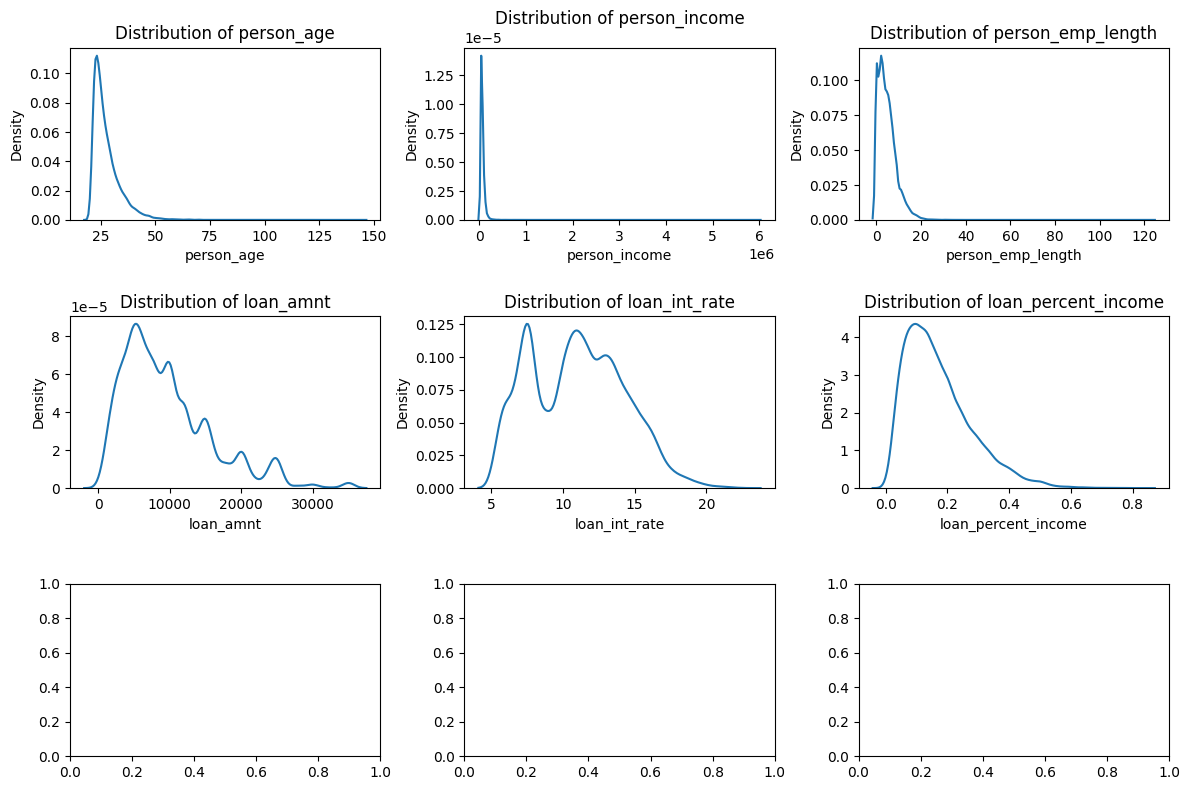

In [150]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()